### Understanding the reverse game for small cases

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools 
from scipy.signal import convolve2d

Possible parents of an alive cell

In [2]:
parents_alive_cell = []

iterable = [(0,0), (0,1), (0,2), (1, 0), (1,2), (2,0), (2,1), (2,2)]

for (x1,y1), (x2,y2) in itertools.combinations(iterable, 2):
    parent_grid = np.zeros((3,3))
    parent_grid[1,1] = 1
    parent_grid[x1,y1] = 1
    parent_grid[x2,y2] = 1
    parents_alive_cell.append(parent_grid)

for (x1,y1), (x2,y2), (x3,y3) in itertools.combinations(iterable, 3):
    parent_grid = np.zeros((3,3))
    parent_grid[1,1] = 1
    parent_grid[x1,y1] = 1
    parent_grid[x2,y2] = 1
    parent_grid[x3,y3] = 1
    parents_alive_cell.append(parent_grid)

for (x1,y1), (x2,y2), (x3,y3) in itertools.combinations(iterable, 3):
    parent_grid = np.zeros((3,3))
    parent_grid[x1,y1] = 1
    parent_grid[x2,y2] = 1
    parent_grid[x3,y3] = 1
    parents_alive_cell.append(parent_grid)

In [3]:
len(parents_alive_cell)

140

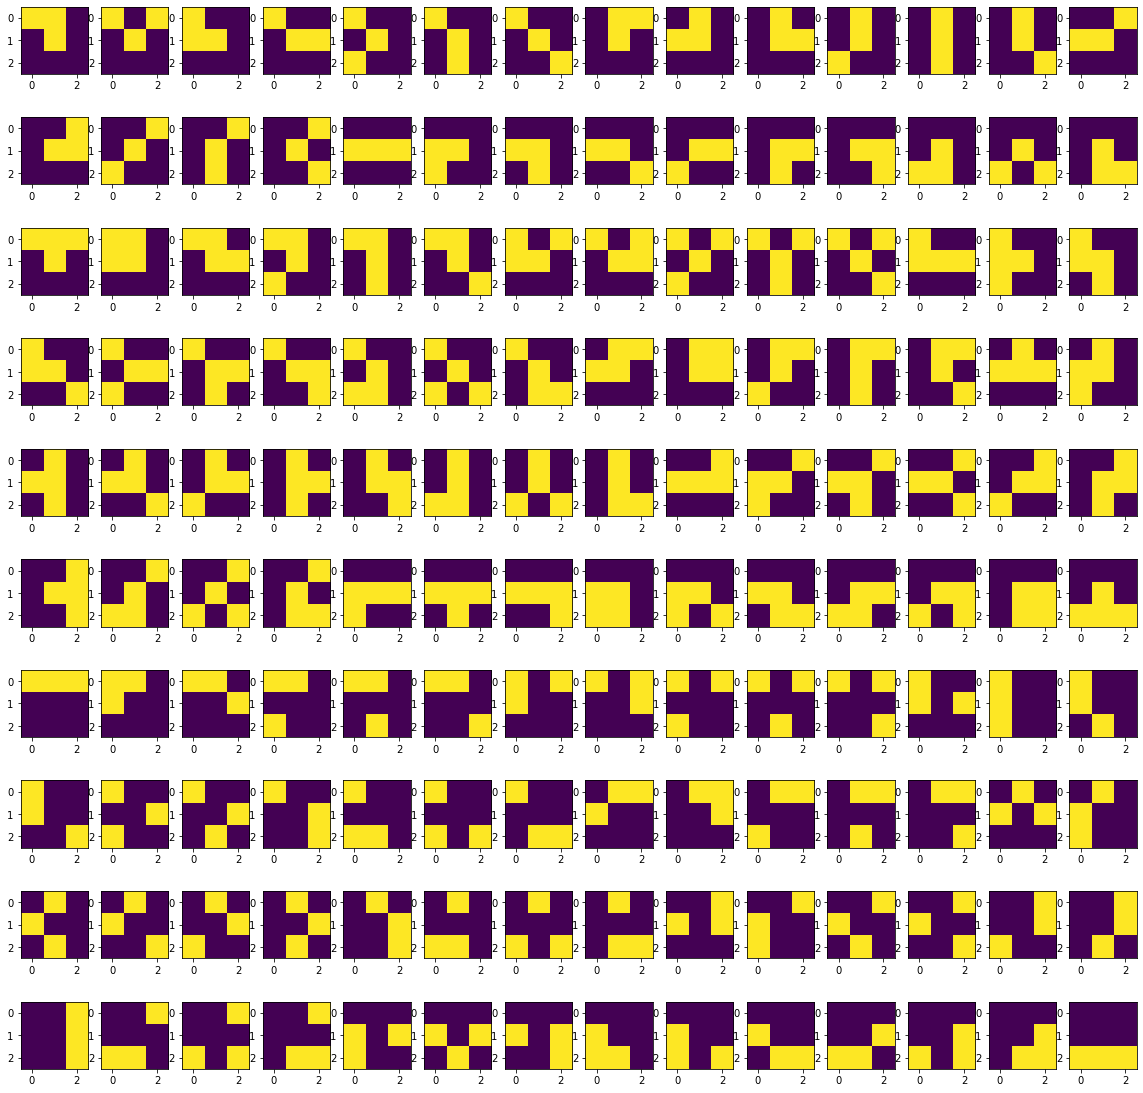

In [4]:
plt.figure(figsize=(20,20))
for i, grid in enumerate(parents_alive_cell):
    plt.subplot(10, 14, i+1)
    plt.imshow(grid)

Find possible parents for a 2x2 alive grid

In [5]:
def attach_grid1(small_grid):
    grid = -1 *np.ones(shape=(4,4))
    for i in [0,1,2]:
        for j in [0,1,2]:
            grid[i,j] = small_grid[i,j]
    return grid

In [6]:
def check_overlap2(grid, grid2):
    return (grid2[0,0] != grid[0, 0+1]) | (grid2[0,1] != grid[0, 1+1]) | (grid2[1,0] != grid[1, 0+1]) | (grid2[1,1] != grid[1, 1+1]) | (grid2[2,0] != grid[2, 0+1]) | (grid2[2,1] != grid[2, 1+1]) 

def check_overlap3(grid, grid3):
    return (grid3[0,0] != grid[0+1, 0+1]) | (grid3[0,1] != grid[0+1, 1+1]) | (grid3[0,2] != grid[0+1, 2+1]) | (grid3[1,0] != grid[1+1, 0+1]) | (grid3[1,1] != grid[1+1, 1+1]) | (grid3[1,2] != grid[1+1, 2+1])

def check_overlap4(grid, grid4):
    return (grid4[0,0] != grid[0+1, 0])|(grid4[0,1] != grid[0+1, 1])|(grid4[0,2] != grid[0+1, 2])|(grid4[1,0] != grid[1+1, 0])| (grid4[1,1] != grid[1+1, 1])| (grid4[1,2] != grid[1+1, 2])| (grid4[2,1] != grid[2+1, 1])|  (grid4[2,2] != grid[2+1, 2])


In [8]:
parents_alive_2x2_grid = []

n = 140
x1 = 0
x2 = 0
x3 = 0
x4 = 0

grid1 = parents_alive_cell[x1]
grid = attach_grid1(grid1)

while x1 < n:
    grid2 = parents_alive_cell[x2]
    if check_overlap2(grid, grid2):
        x3 = 0
        x4 = 0
        y1, x2 = np.divmod(x2 + 1, n)
        x1 = x1 + y1
        continue
    grid[0,3] = grid2[0,2]
    grid[1,3] = grid2[1,2]
    grid[2,3] = grid2[2,2]
    grid3 = parents_alive_cell[x3]
    if check_overlap3(grid, grid3):
        x4 = 0
        y2, x3 = np.divmod(x3 + 1,n)
        y1, x2 = np.divmod(x2 + y2, n)
        x1 = x1 + y1
        continue

    grid[3,1] = grid3[2,0]
    grid[3,2] = grid3[2,1]
    grid[3,3] = grid3[2,2]    
    
    grid4 = parents_alive_cell[x4]
    if check_overlap4(grid, grid4):
        y3,x4 = np.divmod(x4 + 1, n)
        y2,x3 = np.divmod(x3 + y3, n)
        y1,x2 = np.divmod(x2 + y2, n)
        x1 = x1 + y1
        continue
    
    grid[3,0] = grid4[2,0]
    parents_alive_2x2_grid.append(grid)
    x4 = x4 + 1
    grid1 = parents_alive_cell[x1]
    grid = attach_grid1(grid1)
    # print(x1,x2,x3,x4)
    

In [9]:
len(parents_alive_2x2_grid)

296

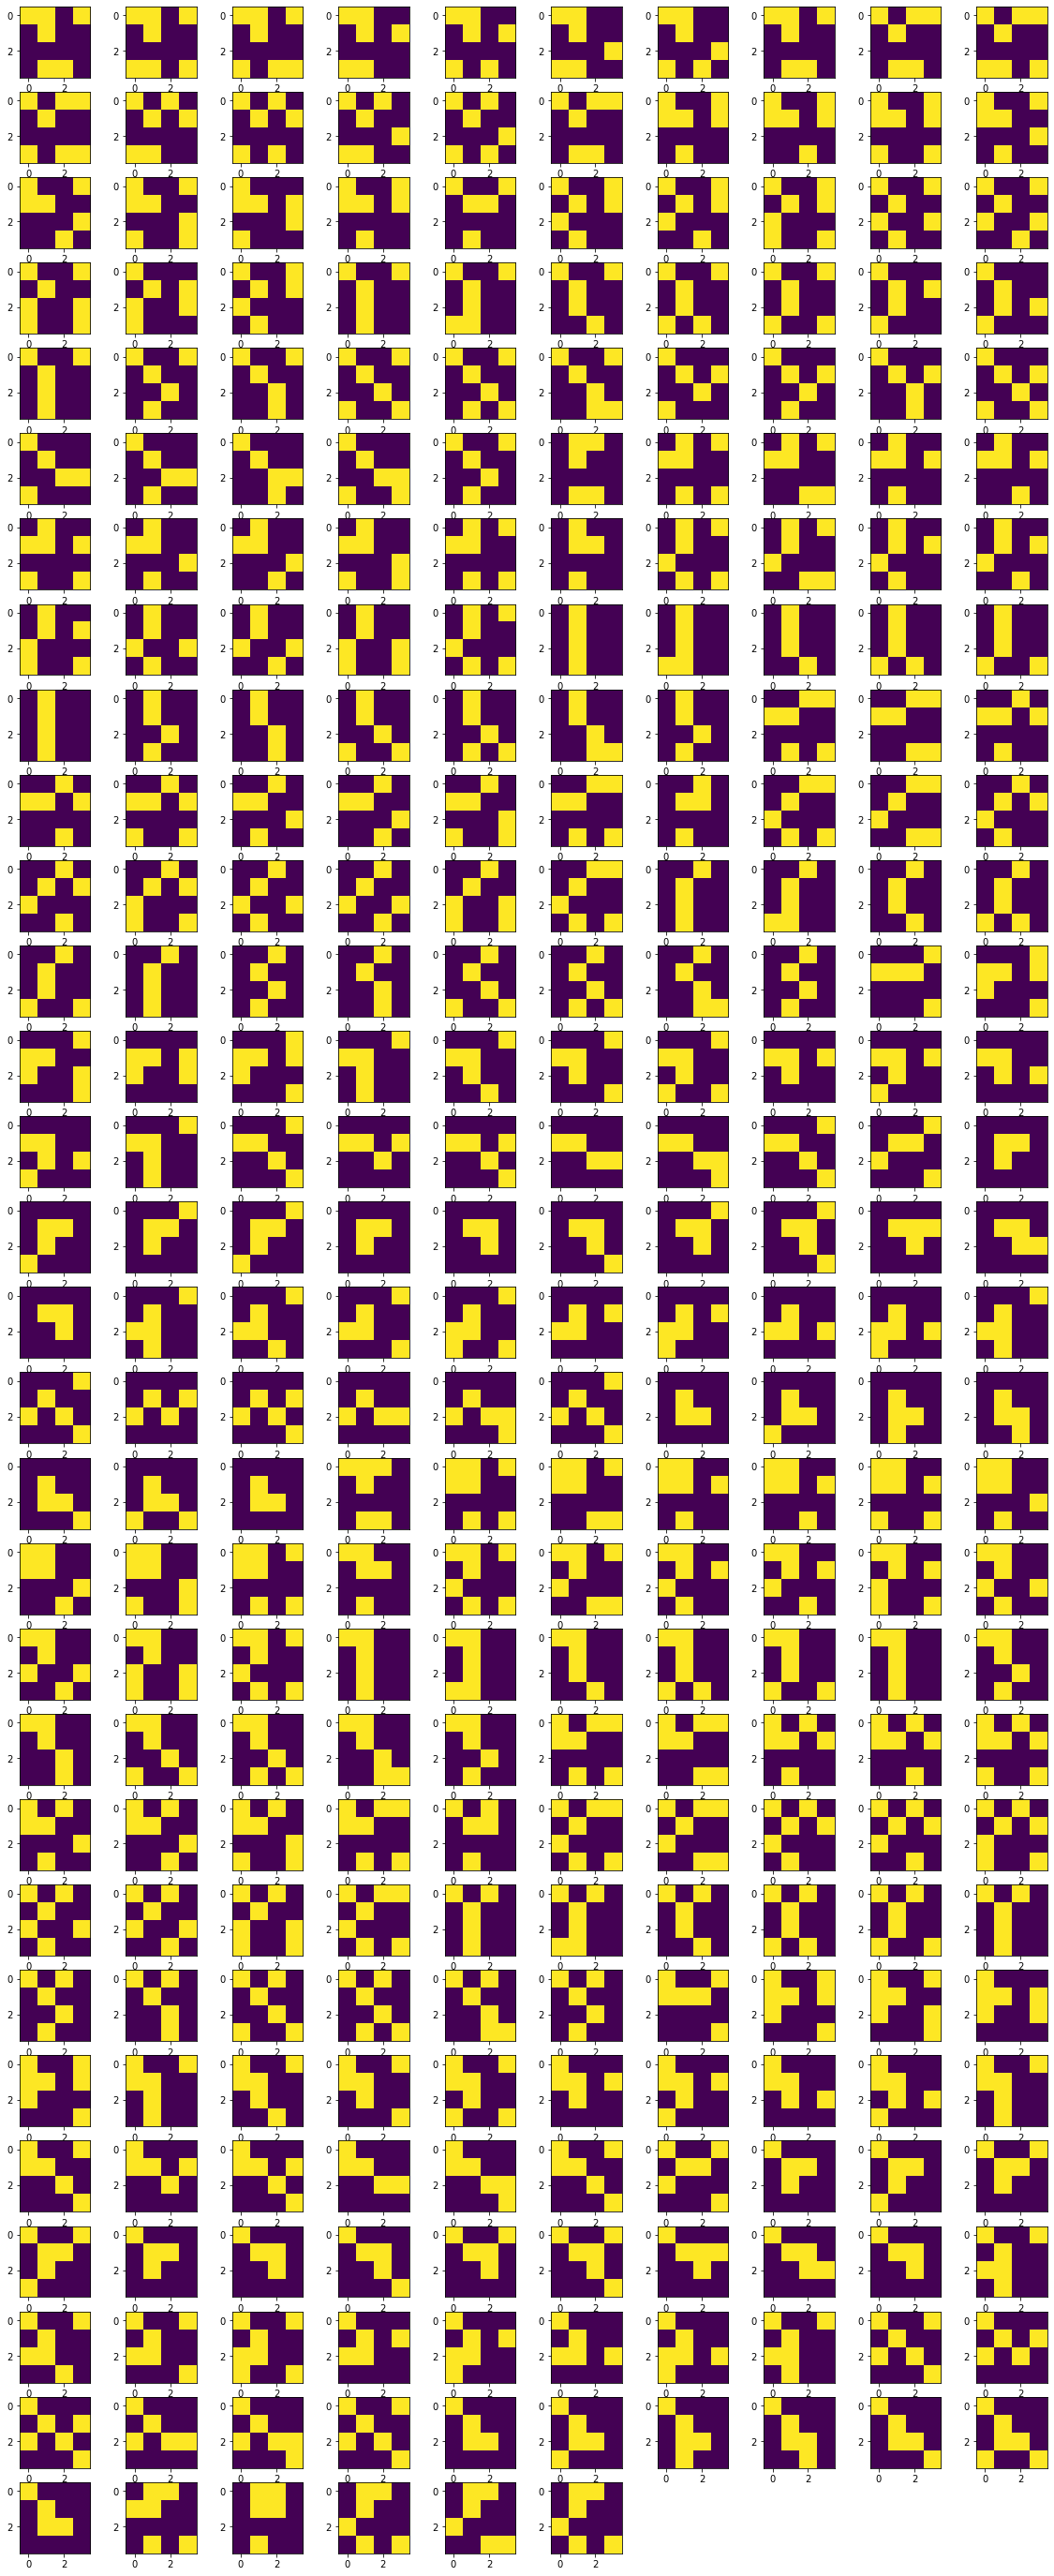

In [10]:
plt.figure(figsize=(20,50))
for i, grid in enumerate(parents_alive_2x2_grid):
    plt.subplot(30, 10, i+1)
    plt.imshow(parents_alive_2x2_grid[i])

In [11]:
def life_step(X):
    """Game of life step using scipy tools"""
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

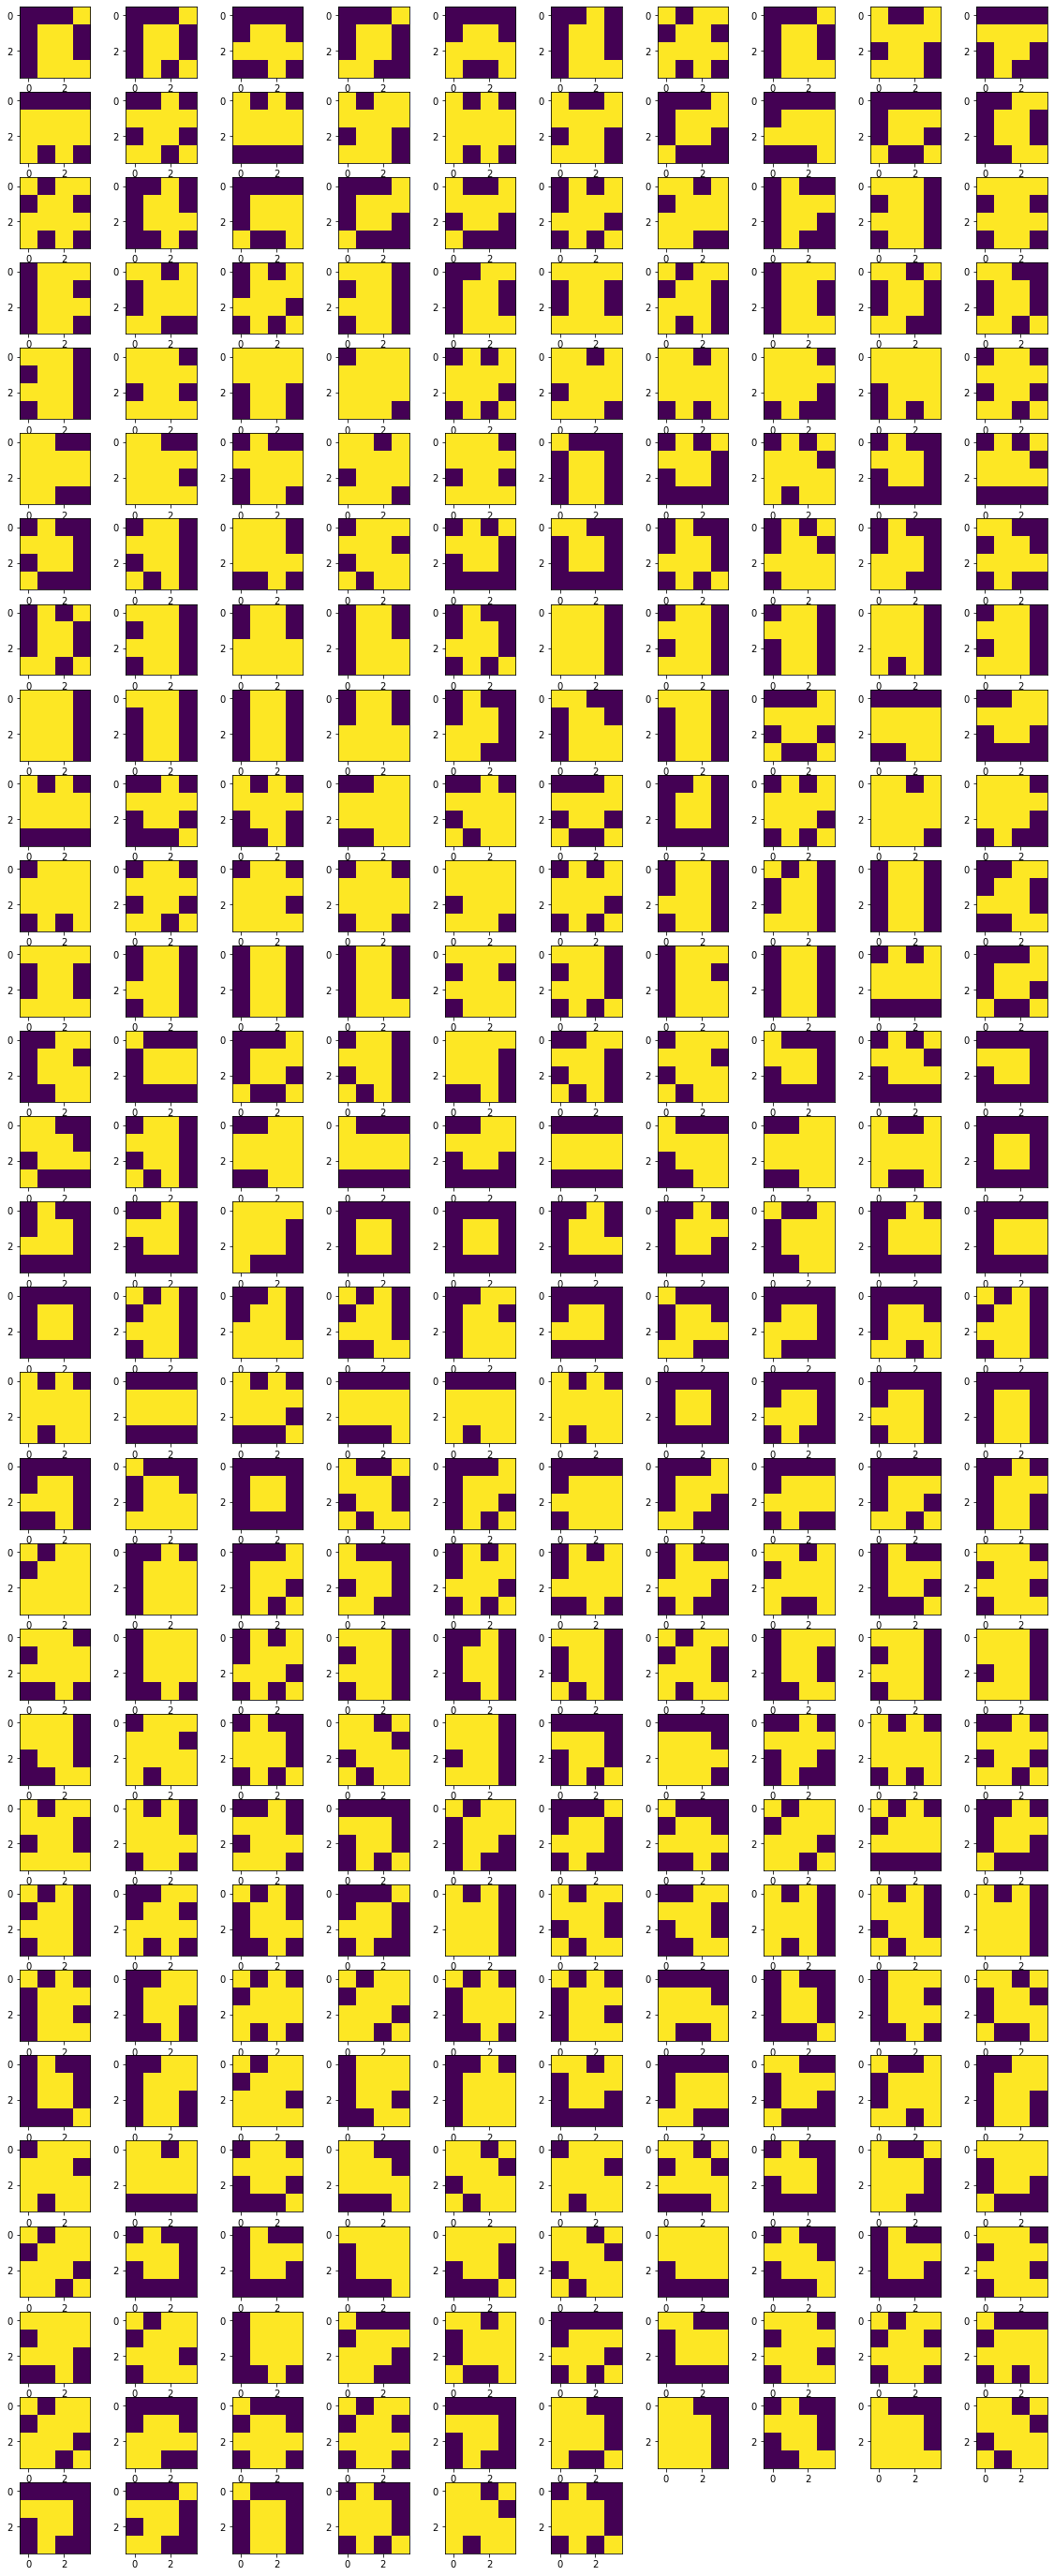

In [12]:
plt.figure(figsize=(20,50))
for i, grid in enumerate(parents_alive_2x2_grid):
    plt.subplot(30, 10, i+1)
    plt.imshow(life_step(parents_alive_2x2_grid[i].astype(int)))